* [Import Packages and Read Data](#0.1)
* [Define Visualisation Functions](#0.2)
* [Plot Time Series](#0.3)
* [Plot Forecast Values using ARIMA](#0.4)


# Import Packages and Read Data <a class="anchor" id="0.1"></a>

In [2]:
import pandas as pd
from tqdm import tqdm
from pandas.api.types import is_numeric_dtype, is_string_dtype
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os

# install forecast tool and pmdarima
!pip install -q forecast-tool
!pip install -q pmdarima
from forecast_tool import forecast_plot as fp

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')
def w(text):
    return print(f'STATUS: {text}')

# get all files location path
all_files =[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path  =(os.path.join(dirname, filename))
        all_files.append(path)

# read all csv
w('Reading all files...')
df_list = []
for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df["Date"],errors='coerce')
        df = df.dropna()
    else:
        df['DATE'] = pd.to_datetime(df["DATE"],errors='coerce')
        df = df.dropna()
    df_list.append(df)
w('Reading all files - Done')

# get all files name
w('Get all files name ...')
titles = []
for mystring in all_files:
    _, _, after_keyword = mystring.partition('1990-2022/')
    before_keyword, _, _ = after_keyword.partition('.csv')
    titles.append(before_keyword)
w('Get all files name - Done')

# get all targets
w('Get all targets ...')
# GET TARGETS
target_list= []
for df in df_list:
    if 'INR' in df.columns:
        target_list.append('INR')
    elif 'Div Yield %' in df.columns:
        target_list.append('Div Yield %')
    elif 'Open' in df.columns:
        target_list.append('Open')
    elif 'OPEN' in df.columns:
        target_list.append('OPEN')
w('Get all targets - Done')

# Get all dates
w('Get all dates ...')
date_list = []
for df in df_list:
    if 'Date' in df.columns:
        date_list.append('Date')
    elif 'DATE' in df.columns:
        date_list.append('DATE')
w('Get all dates - Done')

#Make sure all targets are numeric
w('Make sure all targets are numeric ...')
for df, target, date in zip(df_list, target_list,date_list):
    if is_string_dtype(df[target]):
        df[target] = df[target].str.replace(',', '')
        df[target] = pd.to_numeric(df[target],errors='coerce')
w('Make sure all targets are numeric -Done')  
    
print(f"STATUS: {len(titles)} == number of FILES: {len(all_files)}\
== number of TARGETS: {len(target_list)} == Date list: {len(date_list)}")

# get dimension of each file
shape_list =[]
for df in df_list:
    shape_list.append(df.shape)
dimension_df = pd.DataFrame({'files':titles,'dimension':shape_list})
display(dimension_df)

# read a sample data
df_list[0].head()

STATUS: Reading all files...


100%|██████████| 40/40 [00:17<00:00,  2.25it/s]

STATUS: Reading all files - Done
STATUS: Get all files name ...
STATUS: Get all files name - Done
STATUS: Get all targets ...
STATUS: Get all targets - Done
STATUS: Get all dates ...
STATUS: Get all dates - Done
STATUS: Make sure all targets are numeric ...
STATUS: Make sure all targets are numeric -Done
STATUS: 40 == number of FILES: 40== number of TARGETS: 40 == Date list: 40


,files,dimension
0,NIFTY PSU BANK_Data,"(2860, 5)"
1,NIFTY IT - HistoricalPE_PBDIV_Data,"(6363, 4)"
2,NIFTY INDIA MANUFACTURING - HistoricalPE_PBDIV...,"(246, 4)"
3,NIFTY HOUSING_Data,"(4333, 5)"
4,NIFTY INFRASTRUCTURE_Data,"(2990, 5)"
5,NIFTY PHARMA - HistoricalPE_PBDIV_Data,"(4263, 4)"
6,NIFTY NEXT 50 - HistoricalPE_PBDIV_Data,"(5877, 4)"
7,NIFTY MEDIA_Data,"(2692, 5)"
8,NIFTY HOUSING - HistoricalPE_PBDIV_Data,"(4308, 4)"
9,NIFTY COMMODITIES - HistoricalPE_PBDIV_Data,"(4052, 4)"


,Date,Open,High,Low,Close
0,2022-08-12,2870.75,2891.45,2864.60,2879.60
1,2022-08-11,2828.80,2888.25,2826.95,2870.65
2,2022-08-10,2820.95,2829.10,2795.25,2803.80
3,2022-08-08,2819.25,2829.00,2793.85,2816.80
4,2022-08-05,2850.10,2881.55,2822.10,2829.40


# Define Visualisation Functions <a class="anchor" id="0.2"></a>

In [4]:
def aggregate_period(df, period, date, target): 
    per = df[date].dt.to_period(period)
    g = df.groupby(per).agg({target: ['sum']})
    g.columns = ['metric']
    g.reset_index(level=0, inplace=True)
    g[date]=g[date].astype(str)
    return g

def visual(df, DATE, target, title, n, l, numElems, scientific_annotation):
    date = df[DATE][-n:] ; count_period =df['metric'][-n:]

    plt.plot(date, count_period, linestyle='solid', color='black', marker='o')
    plt.title(f'{title}')
    plt.xlabel('Time')
    plt.ylabel(target)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12.5, 5.5)
        # To get number of annotations, if 0, then no annotations
    if numElems>0:
        
        # to get number of annotations
        idx = np.round(np.linspace(0, len(df) - 1, numElems)).astype(int)
        
        # to loop all values to plot
        for x,y in zip(date[idx],count_period[idx]):
            
            # if number of digits too long, make it scientific annotations
            if (len(str(y)) >5) & (scientific_annotation ==True):
                label = '{:0.2e}'.format(y)
                plt.annotate((label),
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(2,10), # distance from text to points (x,y)
                     ha='center' , fontsize=9) # horizontal alignment can be left, right or center
            else:
                label = y
                plt.annotate((label),
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(2,10), # distance from text to points (x,y)
                     ha='center' , fontsize=9) # horizontal alignment can be left, right or center
    overall_mean180 = count_period.mean()
    plt.fill_between(date, count_period,overall_mean180,where=(count_period>overall_mean180),alpha=0.10, interpolate=True, color='Green')
    plt.fill_between(date, count_period,overall_mean180,where=(count_period<=overall_mean180),alpha=0.10, interpolate=True, color='Red')

    plt.legend(['number of movies', 'above average', 'below average'],loc=l, prop={'size': 8})
    plt.xticks(rotation=90)
    
    IQR = df.metric.quantile(0.75) - df.metric.quantile(0.25)
    min_y = df.metric.min()-IQR
    max_y = df.metric.max()+IQR
    plt.ylim([min_y, max_y])
    
    return plt.show()

# Plot Time Series <a class="anchor" id="0.3"></a>

NIFTY PSU BANK_Data


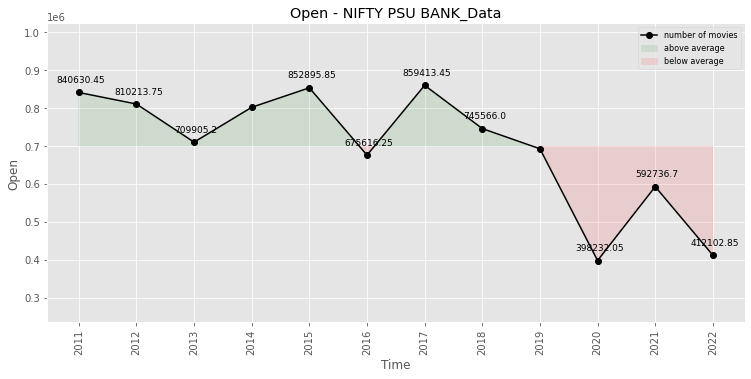

NIFTY IT - HistoricalPE_PBDIV_Data


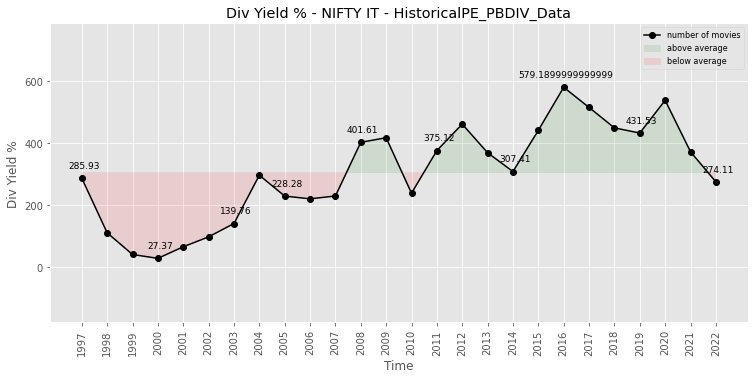

NIFTY INFRASTRUCTURE_Data


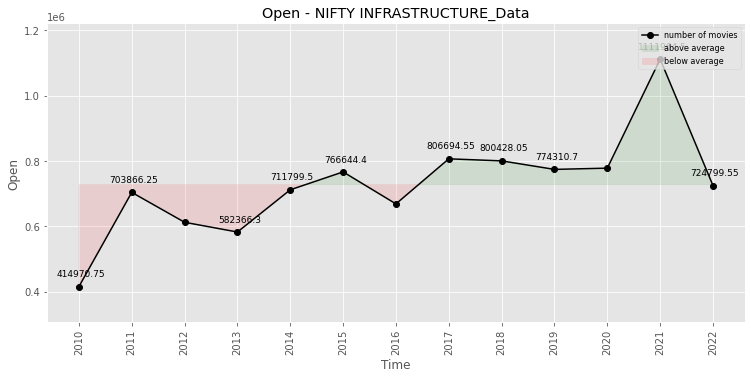

NIFTY PHARMA - HistoricalPE_PBDIV_Data


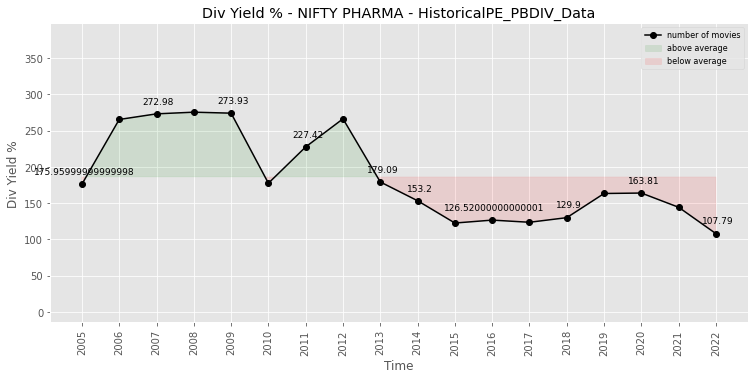

NIFTY NEXT 50 - HistoricalPE_PBDIV_Data


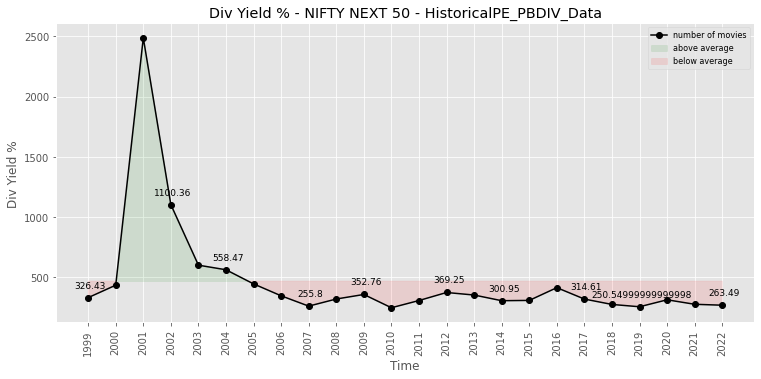

NIFTY MEDIA_Data


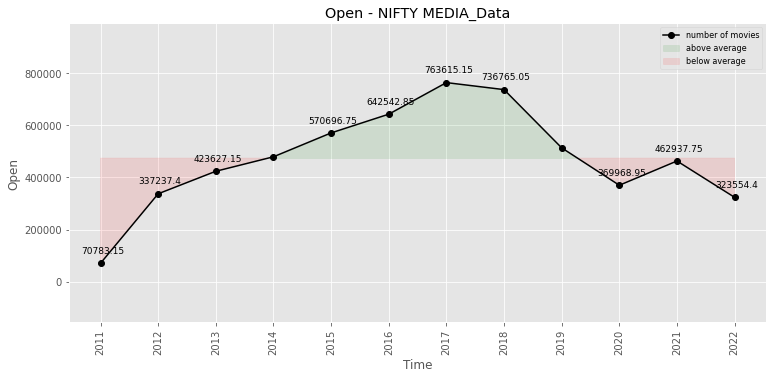

NIFTY HOUSING - HistoricalPE_PBDIV_Data


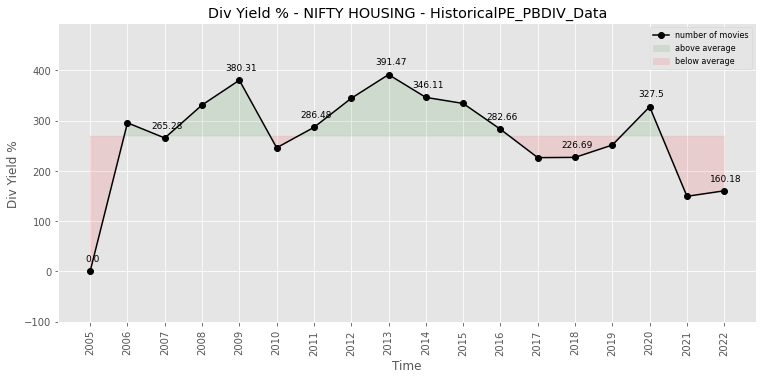

NIFTY COMMODITIES - HistoricalPE_PBDIV_Data


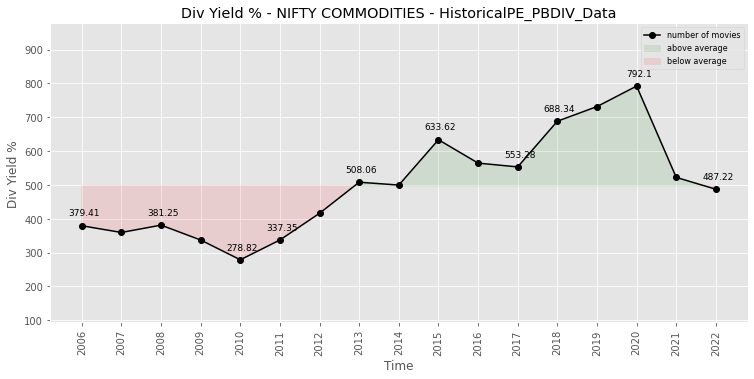

NIFTY NEXT 50_Data


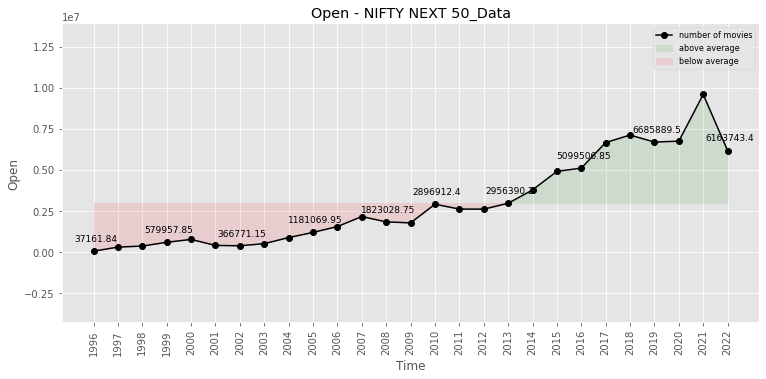

NIFTY ENERGY_Data


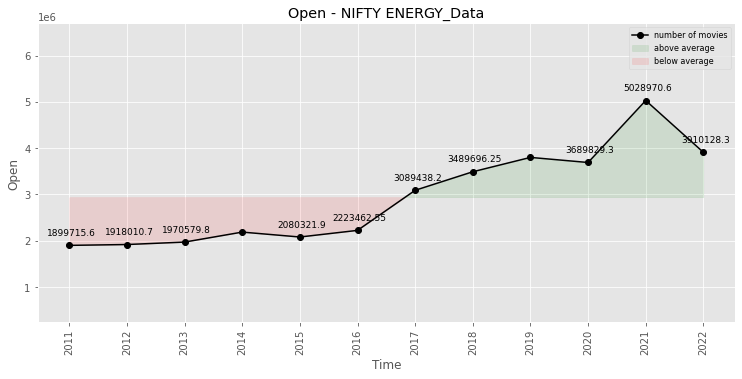

NIFTY COMMODITIES_Data


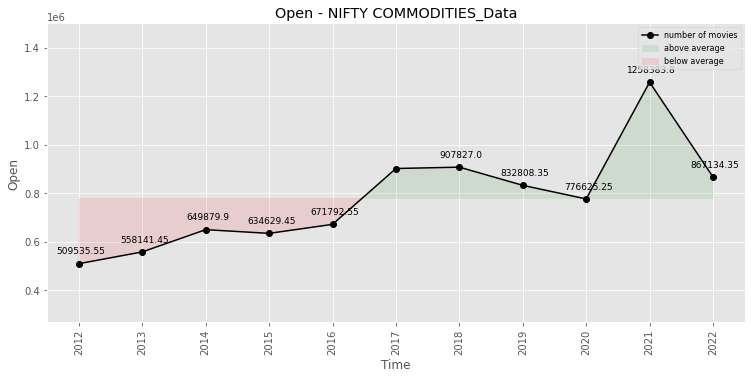

Gold price INR


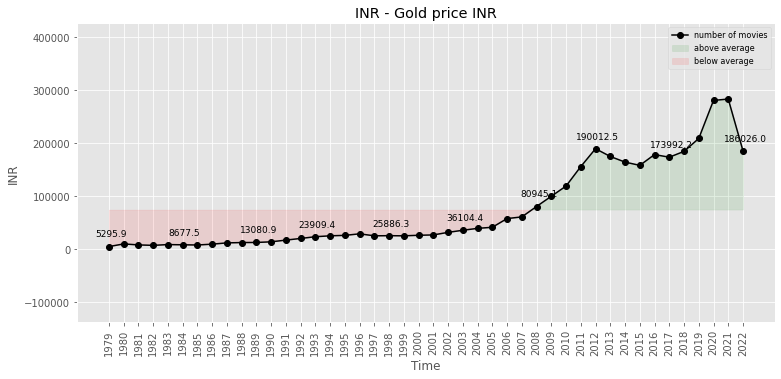

NIFTY BANK_Data


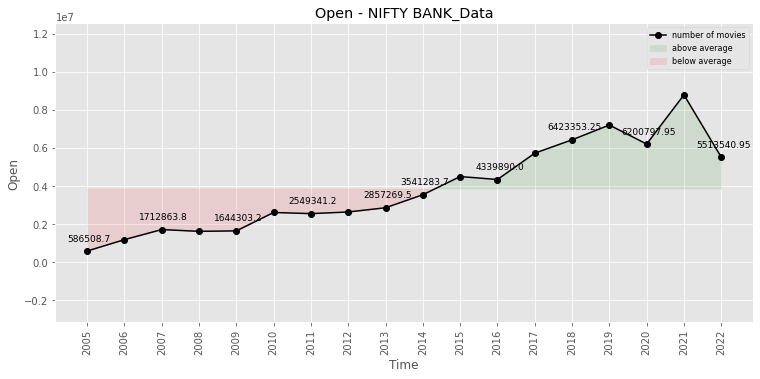

NIFTY OIL  GAS - HistoricalPE_PBDIV_Data


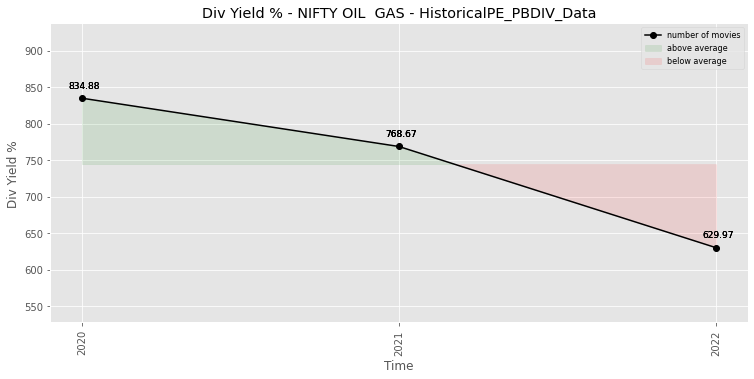

NIFTY 100_Data


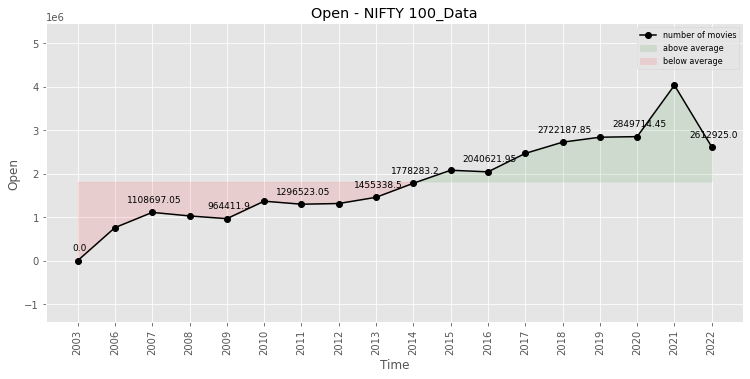

NIFTY METAL_Data


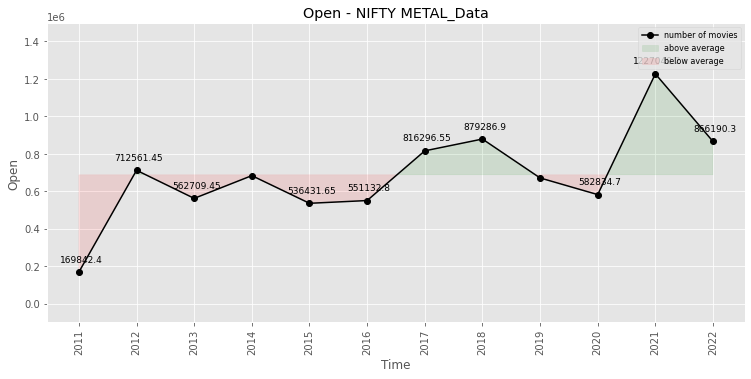

NIFTY INDIA MANUFACTURING_Data


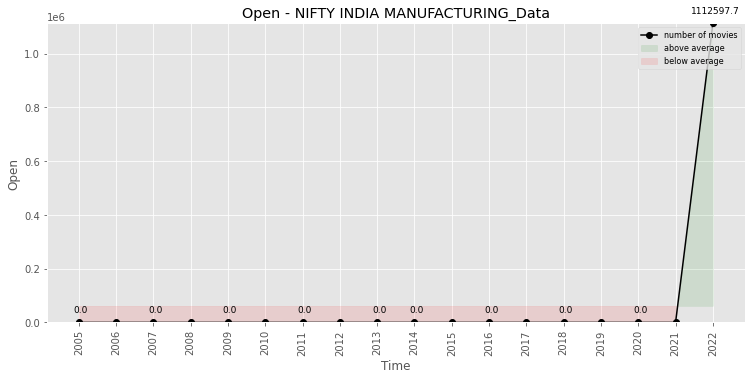

NIFTY PSU BANK - HistoricalPE_PBDIV_Data


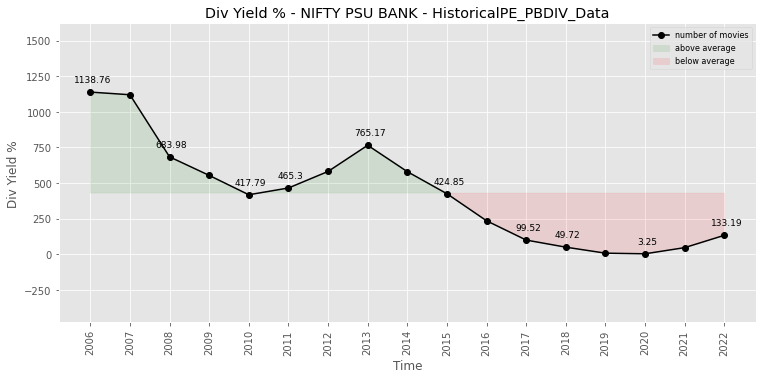

NIFTY PRIVATE BANK - HistoricalPE_PBDIV_Data


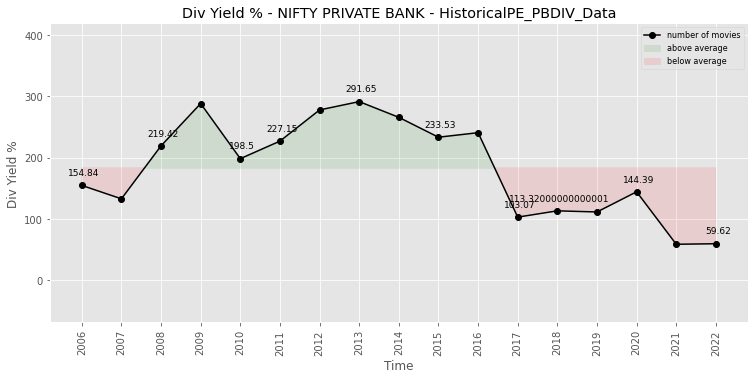

NIFTY 50 - HistoricalPE_PBDIV_Data


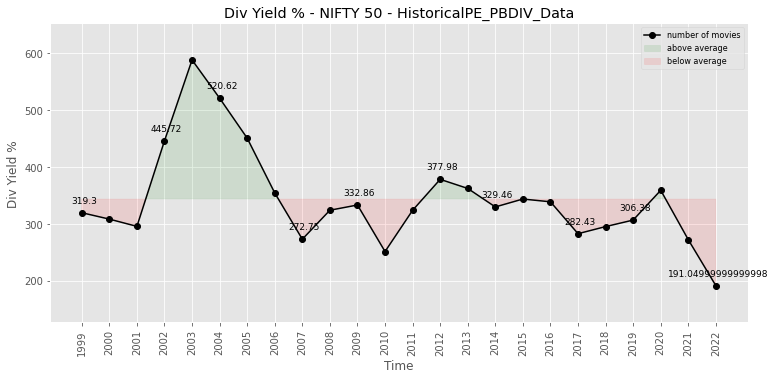

NIFTY MIDCAP 100 - HistoricalPE_PBDIV_Data


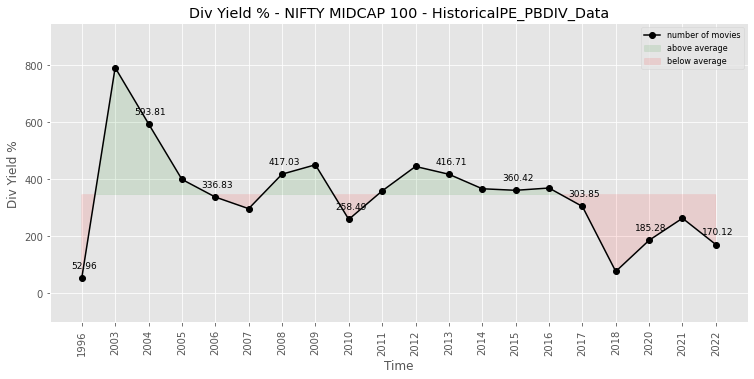

NIFTY AUTO_Data


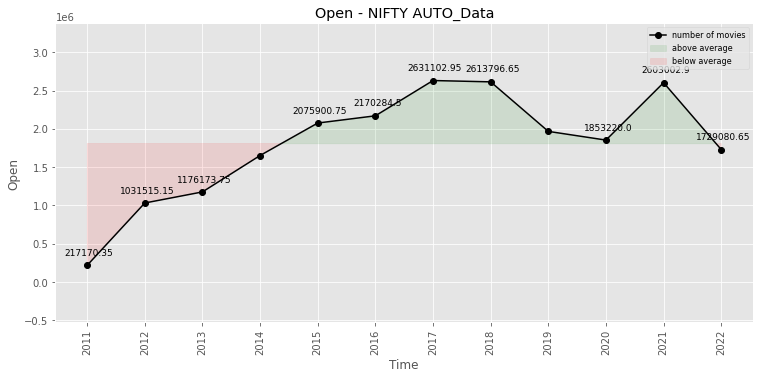

NIFTY 100 - HistoricalPE_PBDIV_Data 


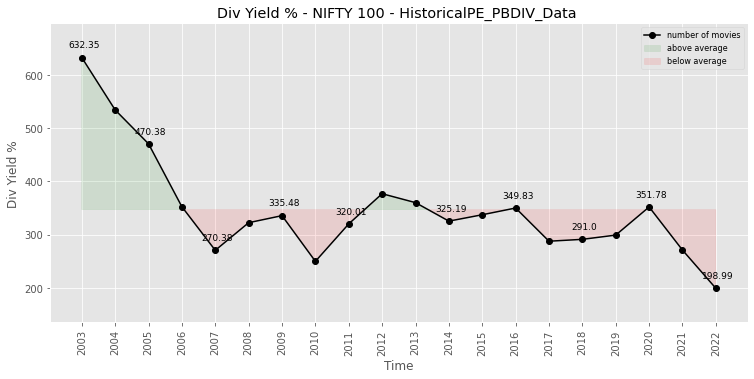

NIFTY AUTO - HistoricalPE_PBDIV_Data


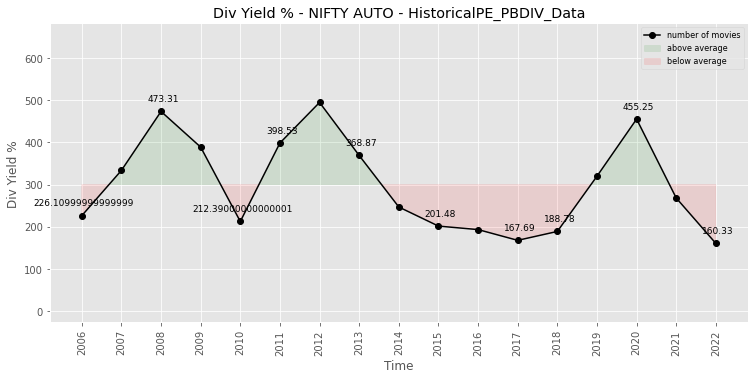

NIFTY MIDCAP 100_Data


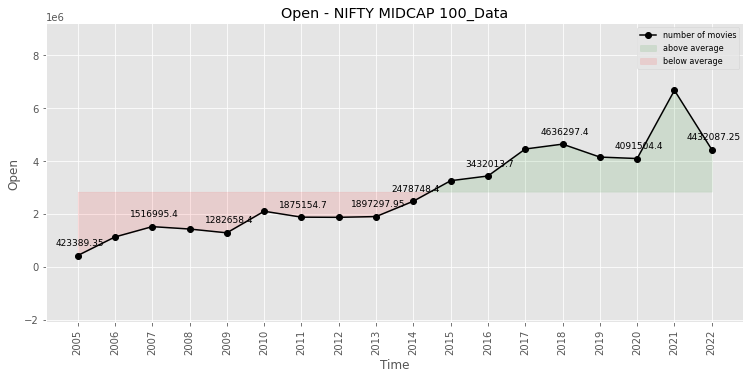

NIFTY PRIVATE BANK_Data


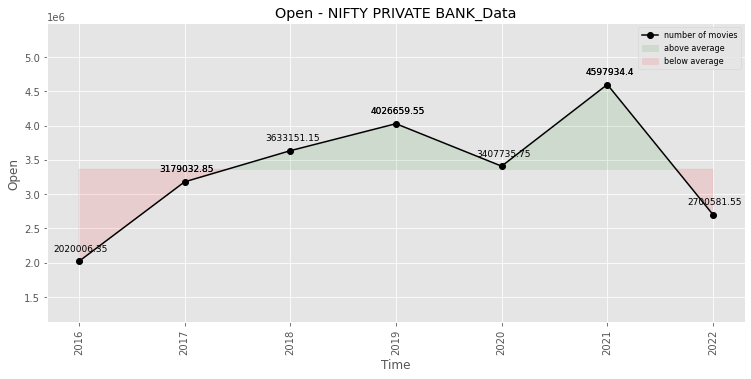

NIFTY INFRASTRUCTURE - HistoricalPE_PBDIV_Data


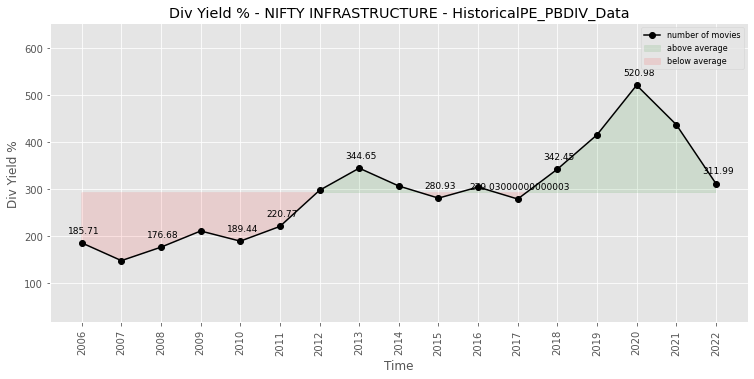

NIFTY OIL  GAS_Data


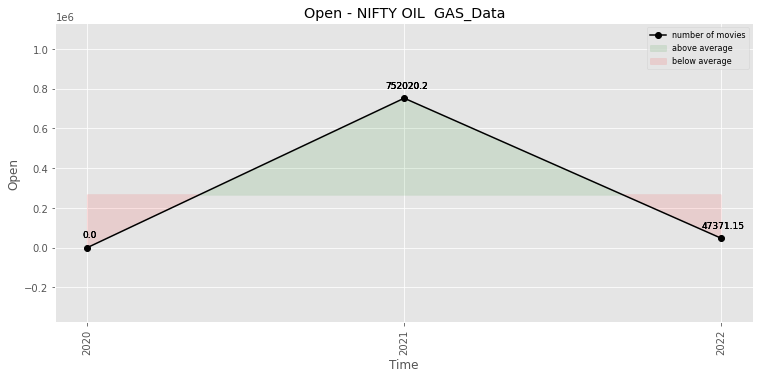

NIFTY MEDIA - HistoricalPE_PBDIV_Data


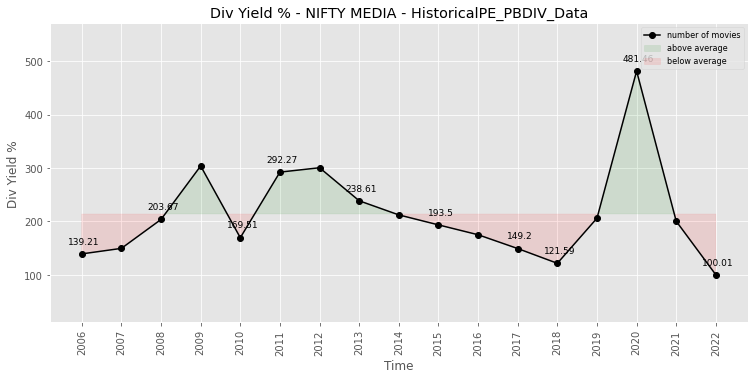

NIFTY BANK - HistoricalPE_PBDIV_Data


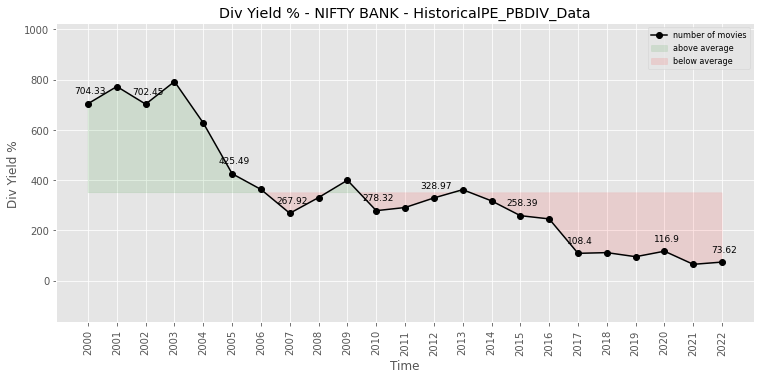

NIFTY FMCG_Data


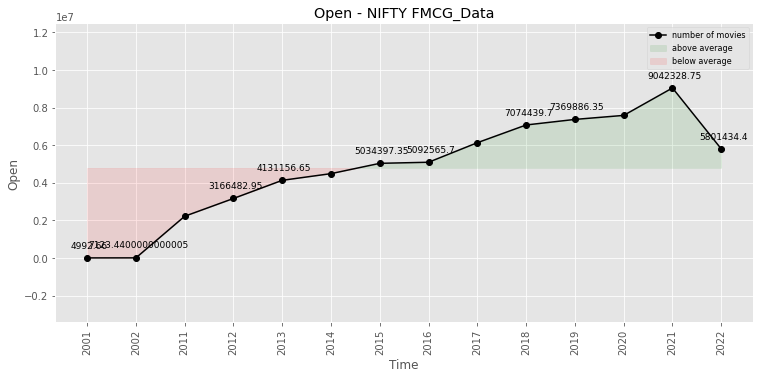

NIFTY IT_Data


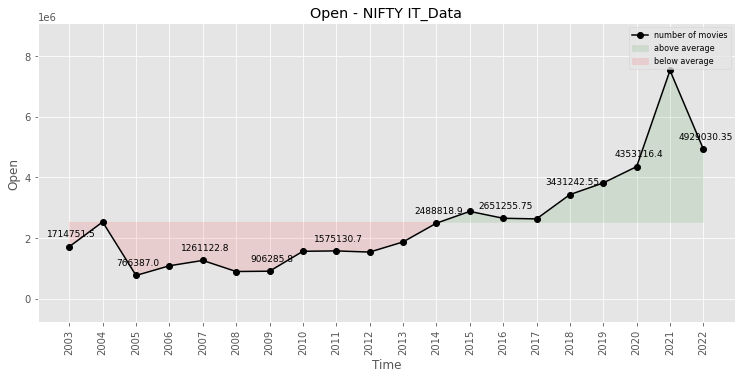

NIFTY METAL - HistoricalPE_PBDIV_Data


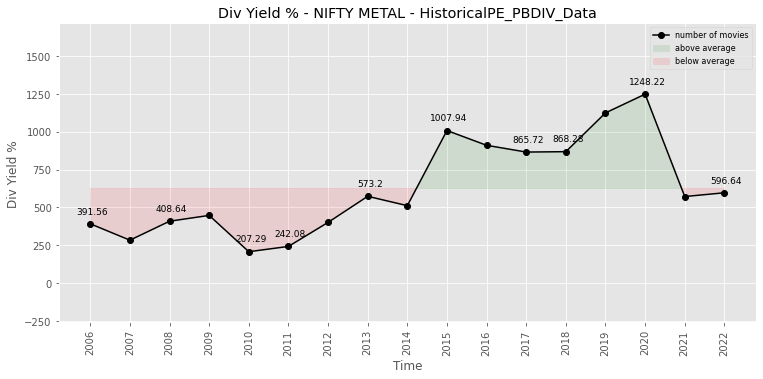

VIX_History


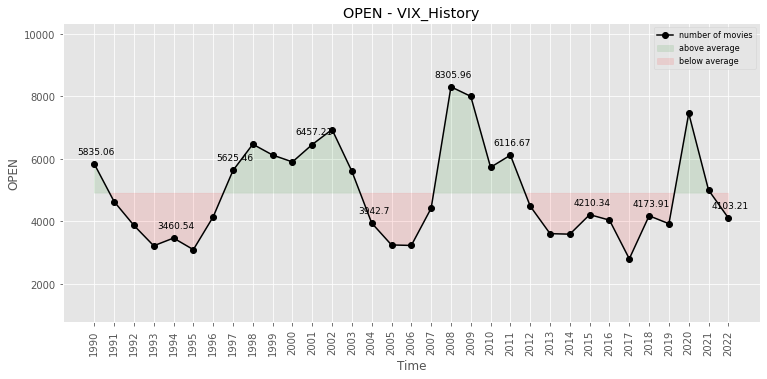

NIFTY FMCG - HistoricalPE_PBDIV_Data


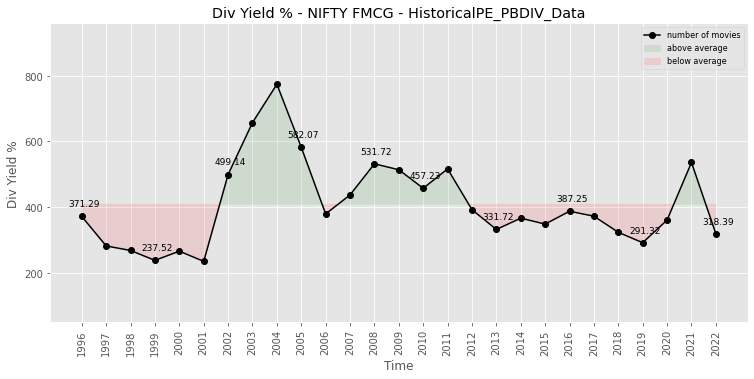

NIFTY PHARMA_Data


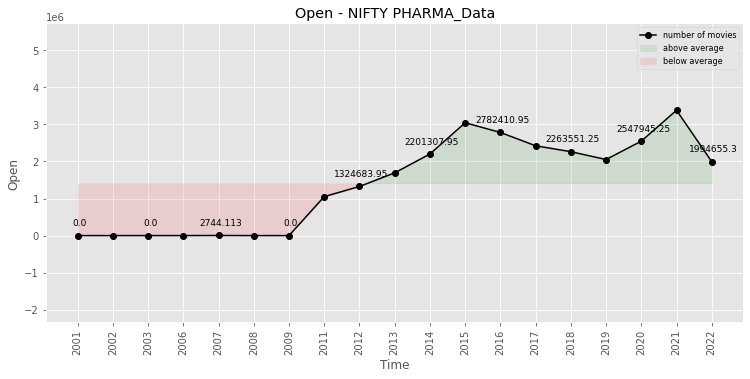

NIFTY ENERGY - HistoricalPE_PBDIV_Data


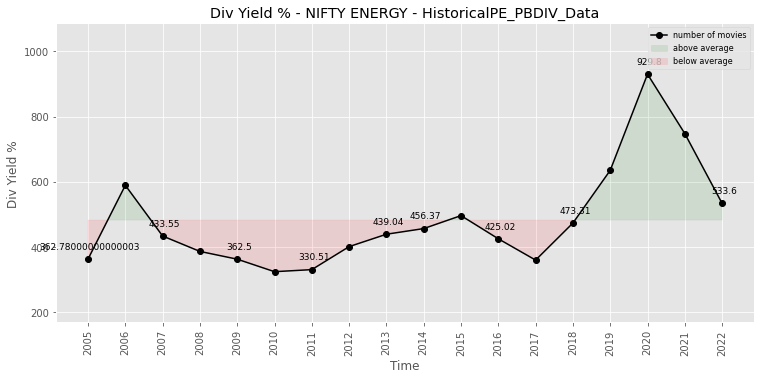

NIFTY 50_Data


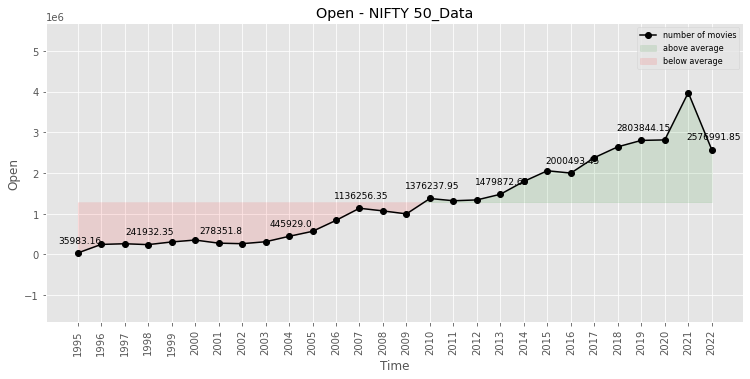

In [5]:
matplotlib.style.use('ggplot')
counter =0
for df, target, date, title in zip(df_list, target_list, date_list, titles):
    if title == "NIFTY INDIA MANUFACTURING - HistoricalPE_PBDIV_Data":
        pass
    elif title == 'NIFTY HOUSING_Data':
        pass
    else:
        print(title)
        y = aggregate_period(df, 'y', date, target)
        my_title = f"{target} - {title}"
        visual(y ,date,target,my_title,100,1,10, scientific_annotation=False)

# Plot Forecast Values using ARIMA <a class="anchor" id="0.4"></a>

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,0,0)(0,0,0)[0] intercept


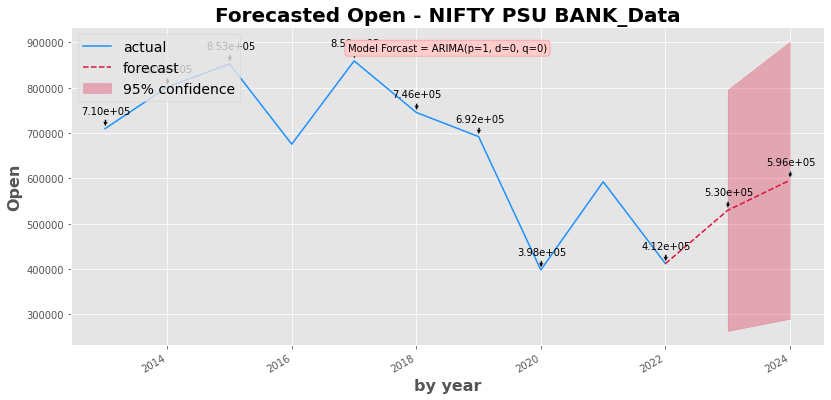

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


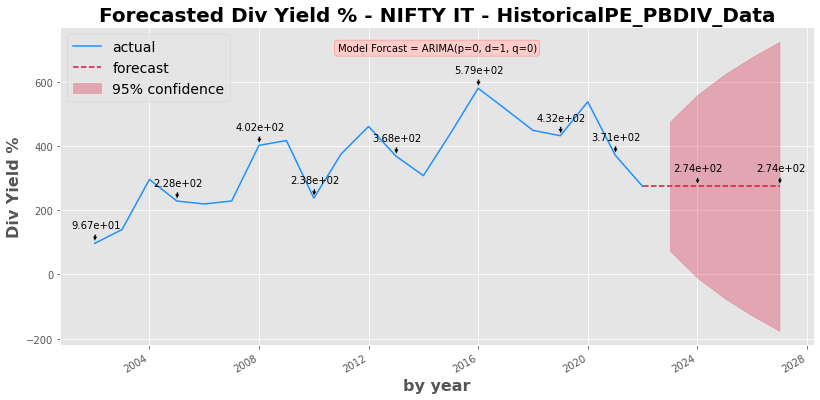

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
STAUS - An error occured for NIFTY INDIA MANUFACTURING - HistoricalPE_PBDIV_Data
All values are not exactly equal, not ideal for forcasting. Suggest to change to a broader period or treat the date first'
Calibrating best ARIMA
STAUS - An error occured for NIFTY HOUSING_Data
The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


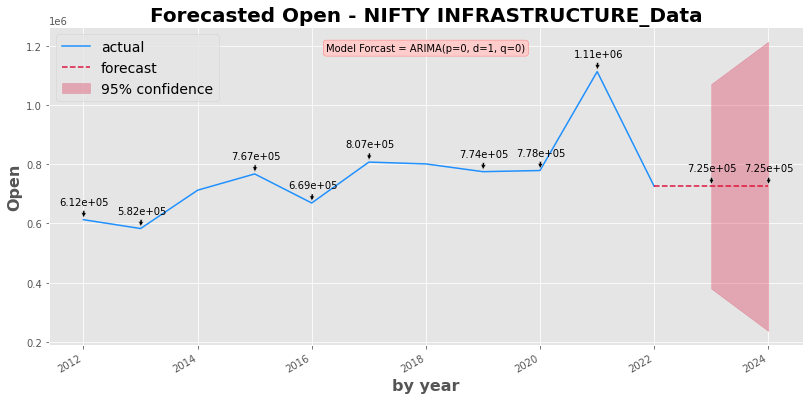

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


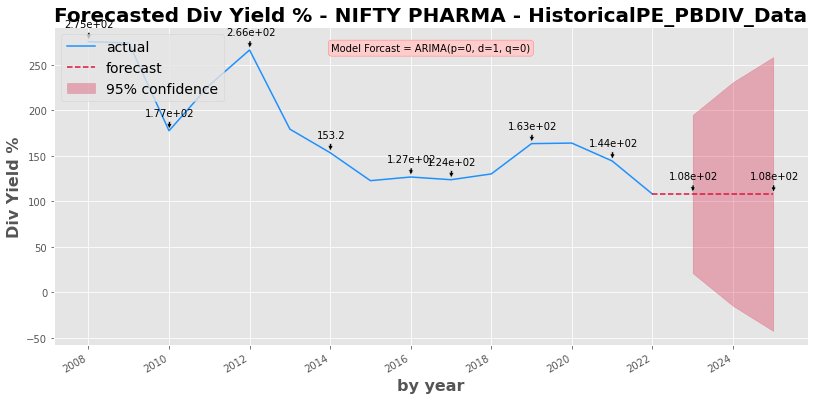

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,1)(0,0,0)[0] intercept


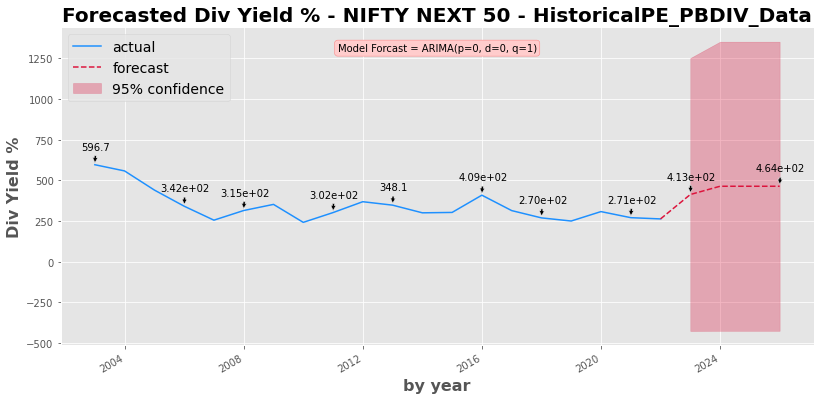

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,0,1)(0,0,0)[0]          


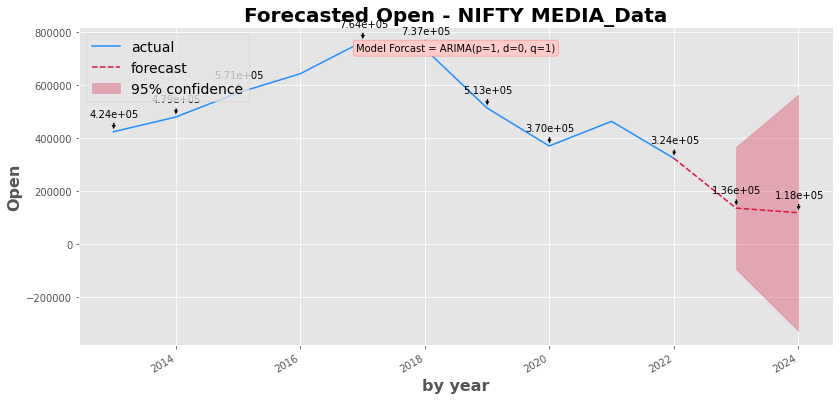

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,1)(0,0,0)[0] intercept


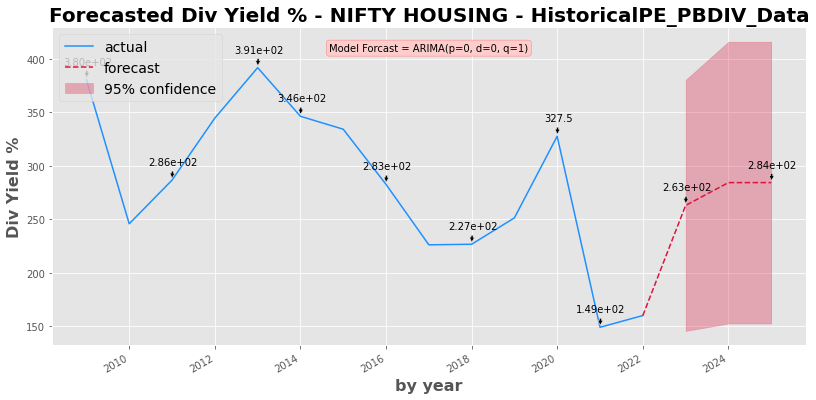

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


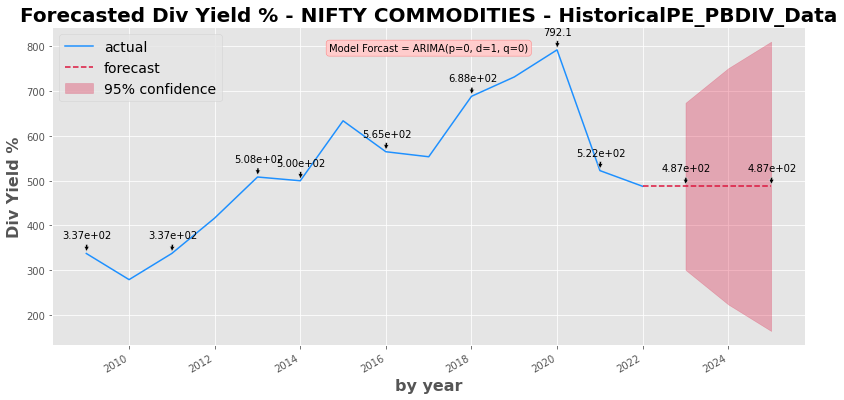

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,1,0)(0,0,0)[0] intercept


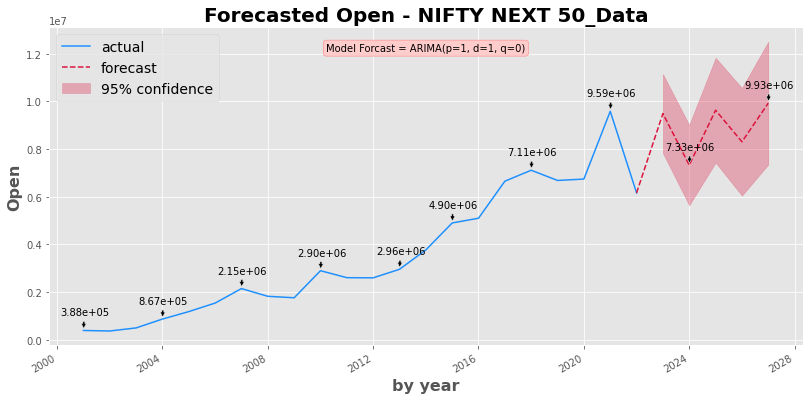

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


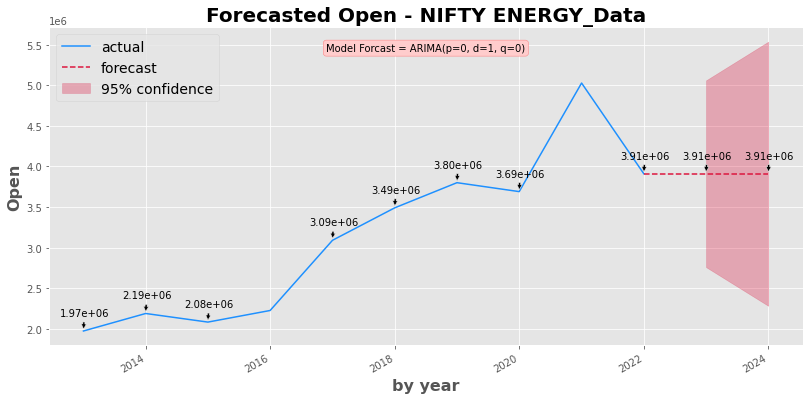

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


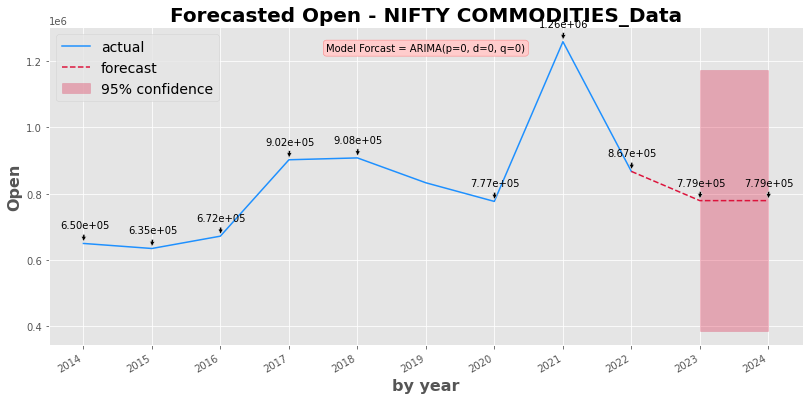

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(2,1,2)(0,0,0)[0] intercept


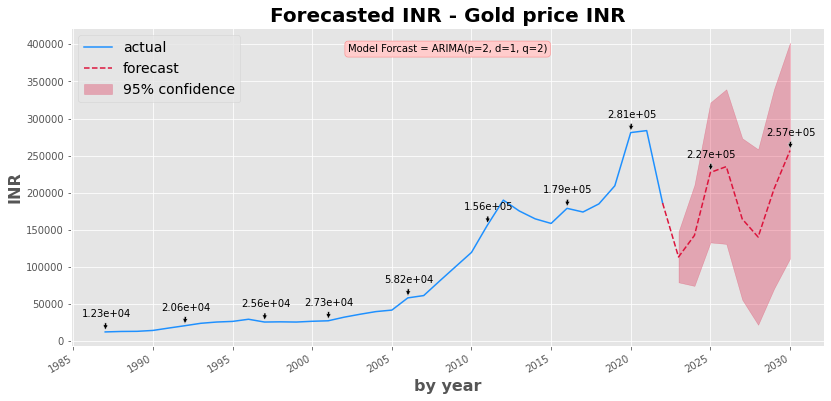

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,1,1)(0,0,0)[0] intercept


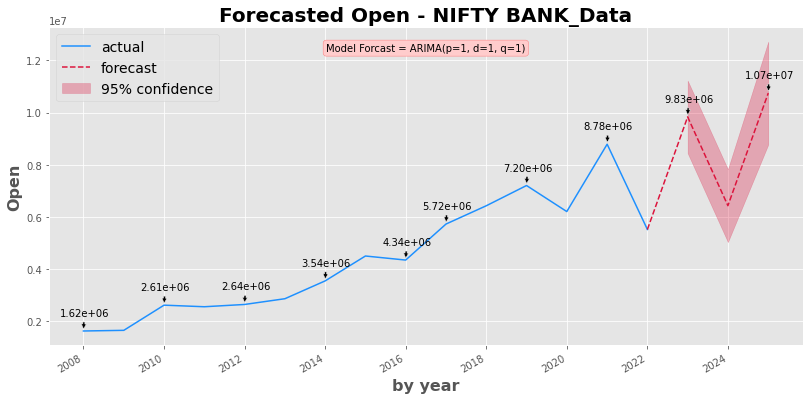

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept
STAUS - An error occured for NIFTY OIL  GAS - HistoricalPE_PBDIV_Data
The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(2,1,0)(0,0,0)[0] intercept


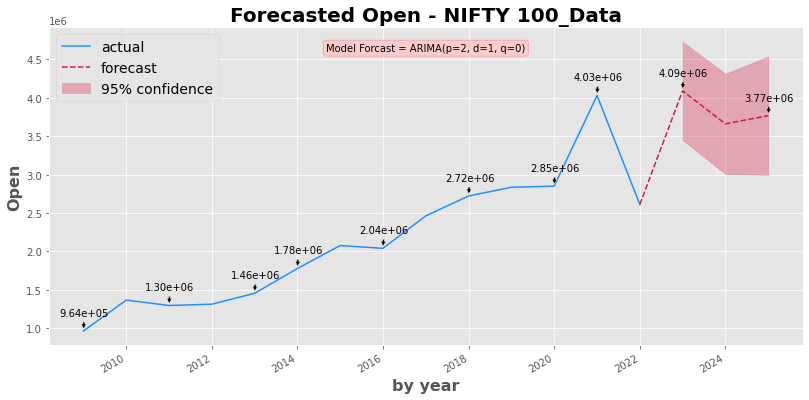

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


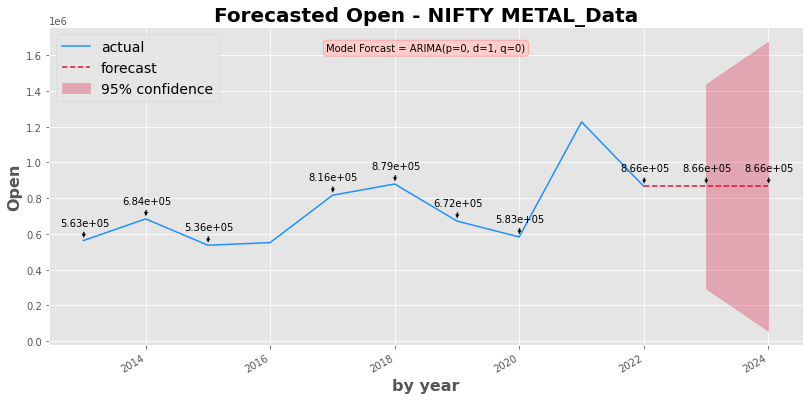

All values are not exactly equal, not ideal for forcasting. Suggest to change to a broader period or treat the date first'
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0]          
STAUS - An error occured for NIFTY INDIA MANUFACTURING_Data
The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA


/opt/conda/lib/python3.7/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Optimised:  ARIMA(0,1,0)(0,0,0)[0] intercept


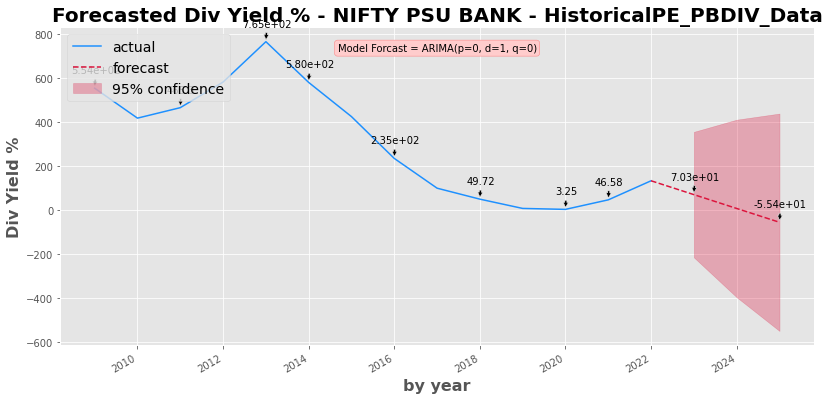

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,0,0)(0,0,0)[0] intercept


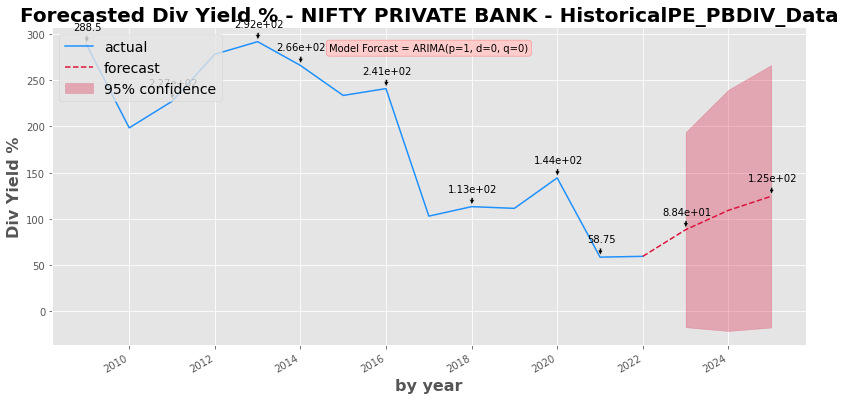

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,0,1)(0,0,0)[0] intercept


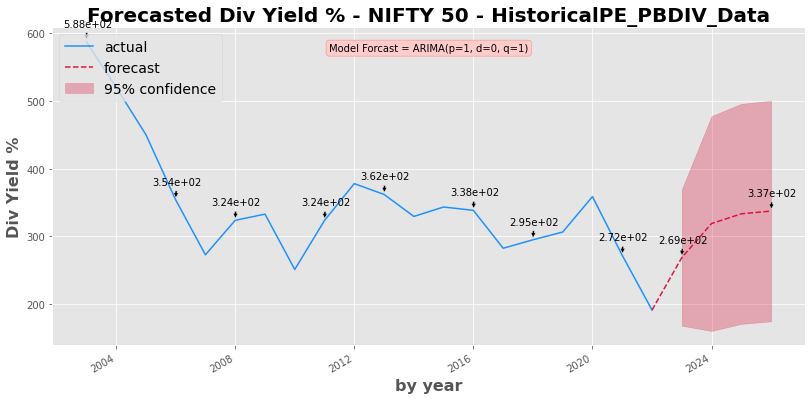

All values are not exactly equal, not ideal for forcasting. Suggest to change to a broader period or treat the date first'
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


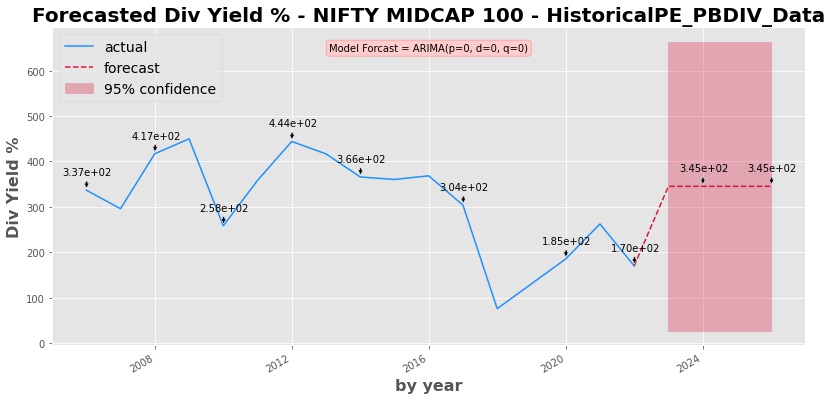

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


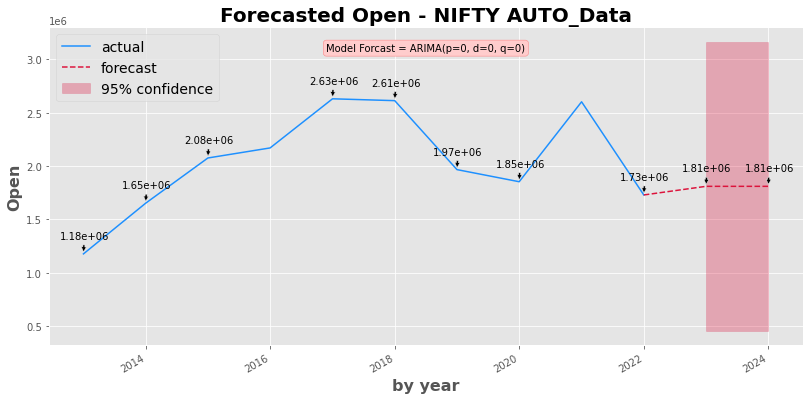

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,0,0)(0,0,0)[0] intercept


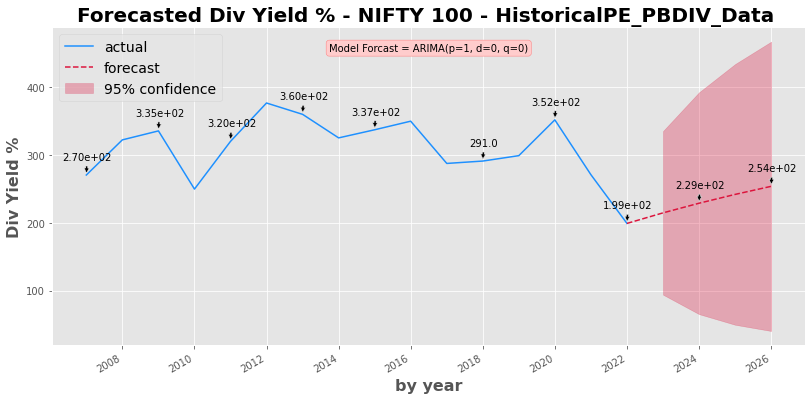

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(3,0,0)(0,0,0)[0] intercept


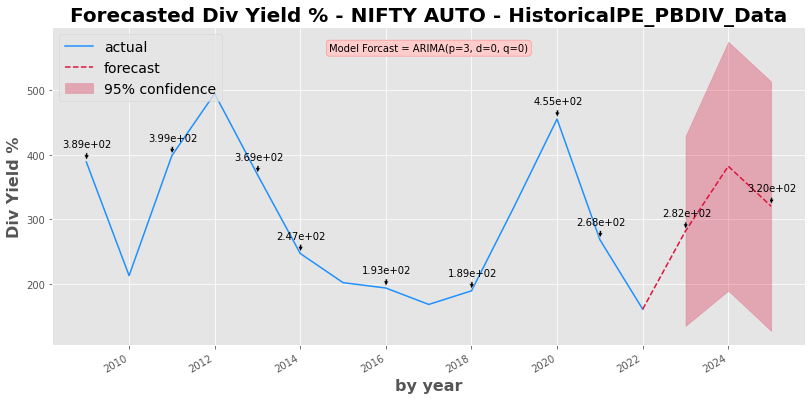

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(2,1,0)(0,0,0)[0] intercept


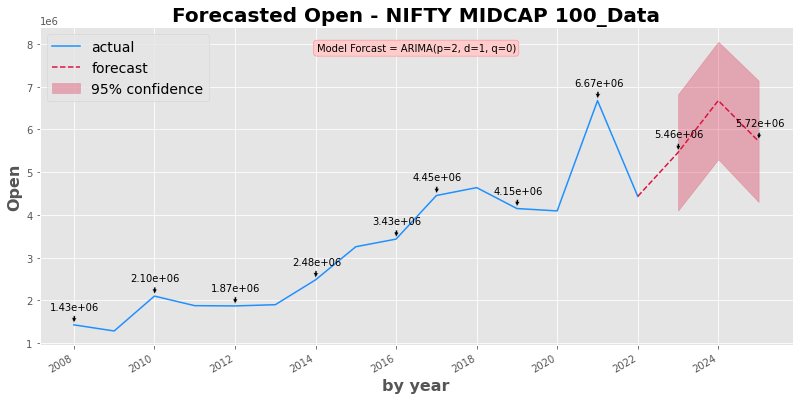

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


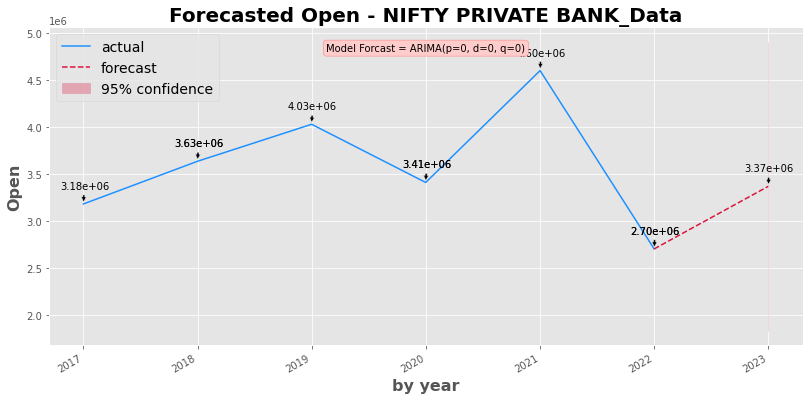

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


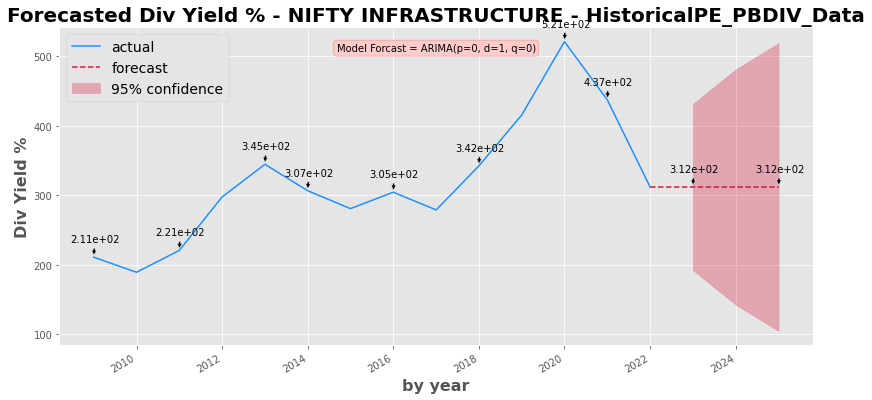

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
STAUS - An error occured for NIFTY OIL  GAS_Data
The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


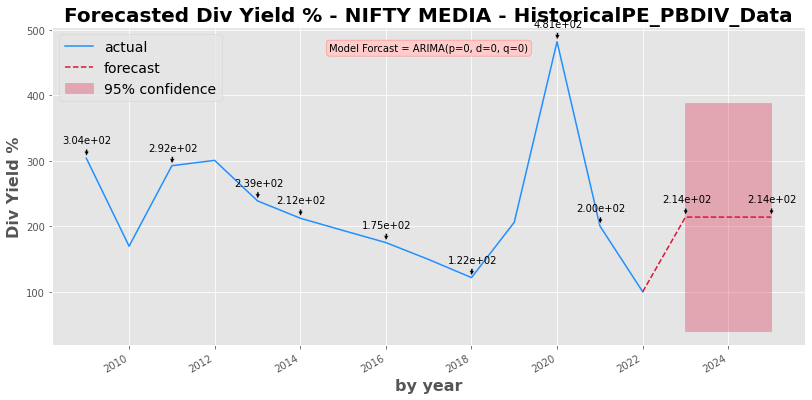

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0] intercept


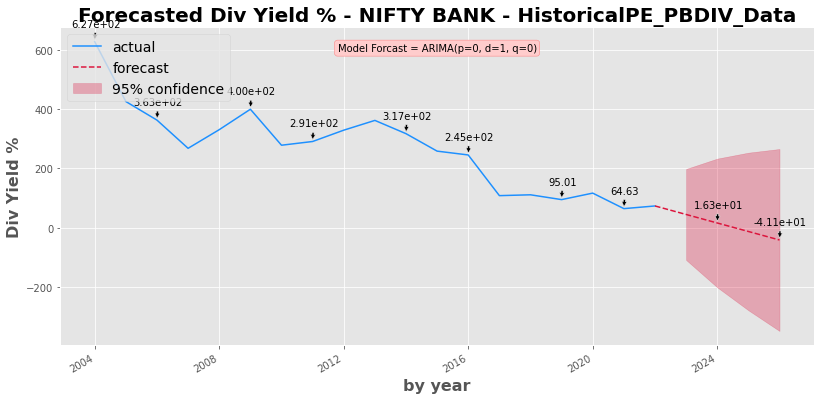

All values are not exactly equal, not ideal for forcasting. Suggest to change to a broader period or treat the date first'
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


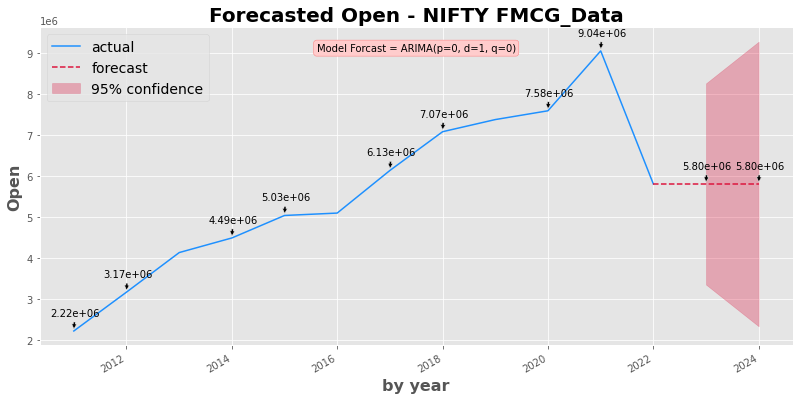

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


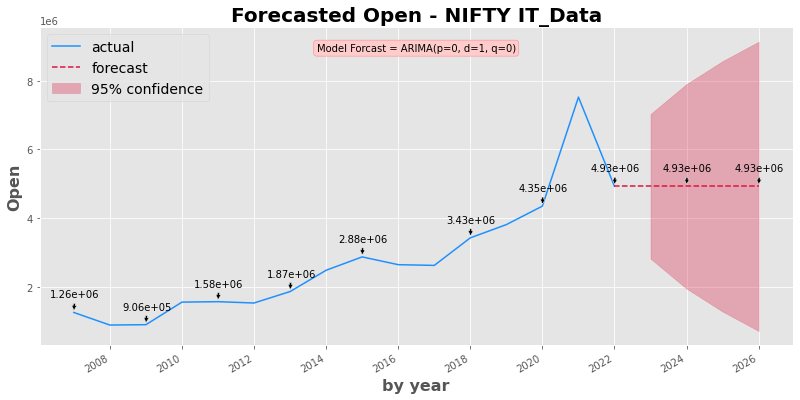

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,1,0)(0,0,0)[0]          


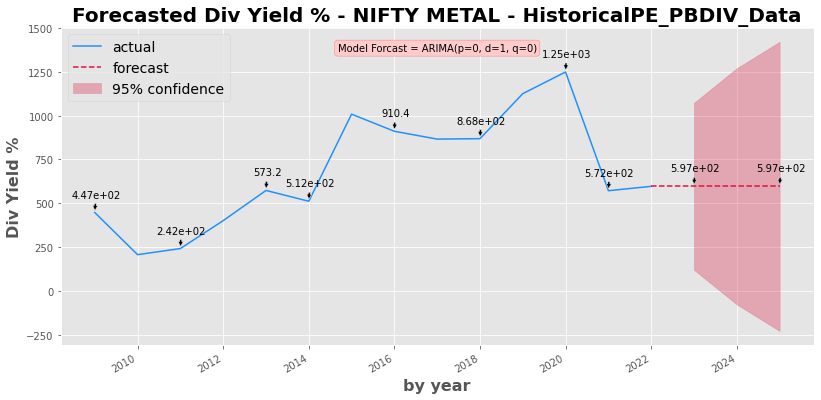

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(2,0,0)(0,0,0)[0] intercept


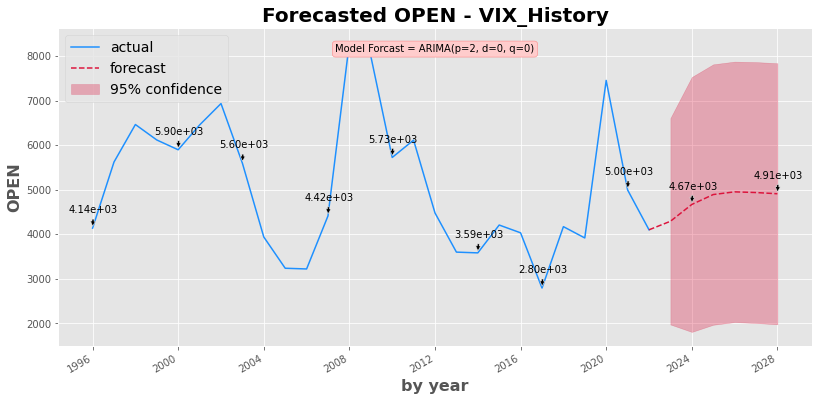

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,2)(0,0,0)[0] intercept


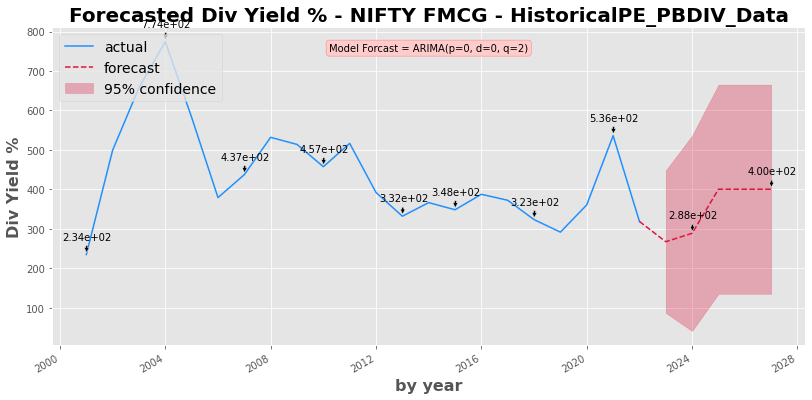

All values are not exactly equal, not ideal for forcasting. Suggest to change to a broader period or treat the date first'
Calibrating best ARIMA
Optimised:  ARIMA(0,0,0)(0,0,0)[0] intercept


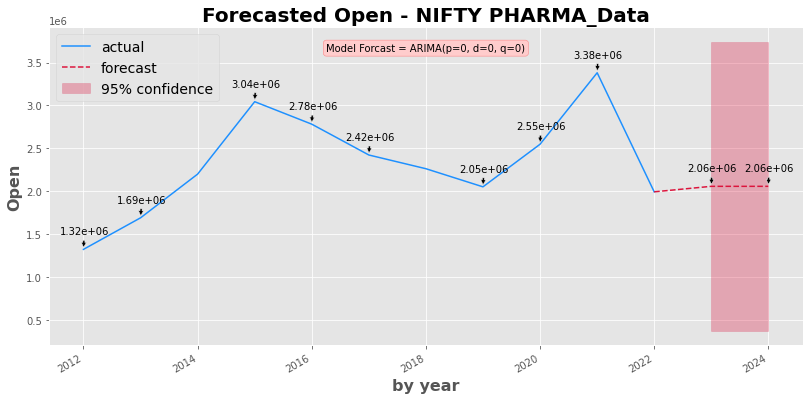

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(0,0,1)(0,0,0)[0] intercept


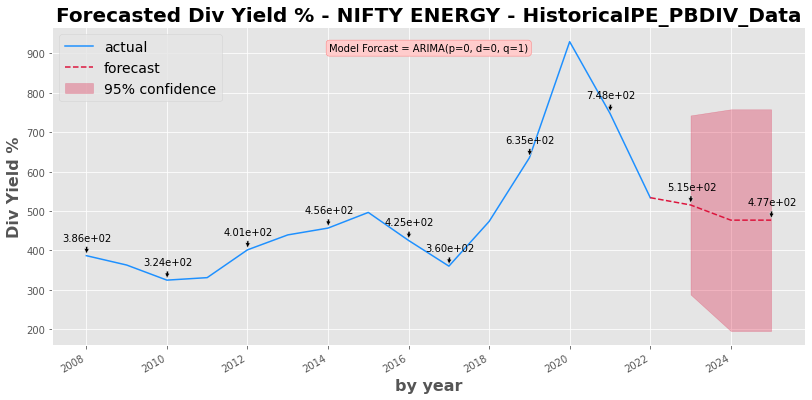

The date interval for each data points is the same, of 'year' interval
Calibrating best ARIMA
Optimised:  ARIMA(1,1,1)(0,0,0)[0] intercept


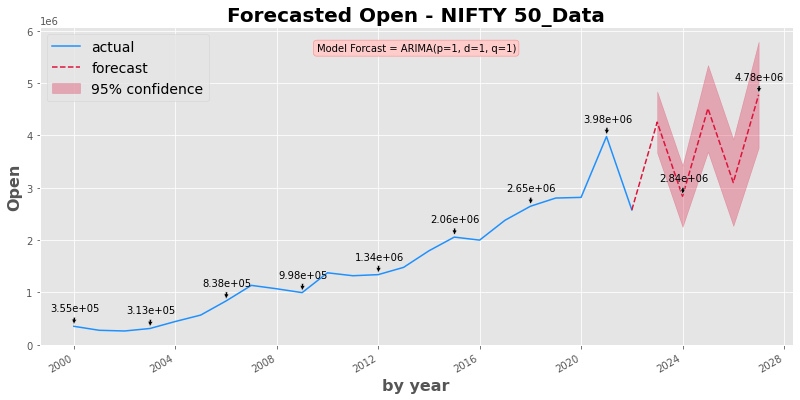

In [6]:
for df, target, date, title in zip(df_list, target_list, date_list, titles):
    try:
        fp.overall_vis(df, date, target, 'y', my_title =f"Forecasted {target} - {title}", matplotlib_style ='ggplot')
    except:
        print(f"STAUS - An error occured for {title}")